In [1]:
import os
# /Users/egorgusev/Анализ данных/Задание 3
os.chdir("/Users/egorgusev/Анализ данных/Задание 3")

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [3]:
import geopandas as gpd
import contextily as ctx

In [4]:
df = pd.read_csv("ALL_SPB_STOPS.csv", sep=';', encoding='Windows-1251', decimal=',')

In [5]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df)

      ID_STOP                                          STOP_NAME  \
0      100101                                     Пр.Ветеранов-1   
1      100102                                     Пр.Ветеранов-2   
2      100103                                    Ленинский пр.-1   
3      100104                                    Ленинский пр.-2   
4      100105                                             Автово   
5      100106                                    Кировский завод   
6      100107                                           Нарвская   
7      100108                                         Балтийская   
8      100109                                         Пушкинская   
9      100110                                       Владимирская   
10     100111                                    Пл. Восстания-1   
11     100112                                    Пл. Восстания-2   
12     100113                                       Чернышевская   
13     100114                                   

In [7]:
print(df)

      ID_STOP                           STOP_NAME           LATITUDE  \
0      100101                      Пр.Ветеранов-1   59.8416038827508   
1      100102                      Пр.Ветеранов-2   59.8420417837763   
2      100103                     Ленинский пр.-1   59.8516834239607   
3      100104                     Ленинский пр.-2   59.8497096845857   
4      100105                              Автово   59.8672920598579   
...       ...                                 ...                ...   
7149     4997         ЗАВОД ИМ. КАЛИНИНА [тест] <  59.95069505060761   
7150     4998  МАЛЫЙ ПР. В.О. ПО 9 ЛИНИИ [тест] <  59.94569778533688   
7151     5003         АДМИРАЛТЕЙСКИЙ ПР. [тест] <  59.93602605740318   
7152     7069              ПР. ЛУНАЧАРСКОГО(тест)  60.03143940049296   
7153     7070               УЧИТЕЛЬСКАЯ УЛ (тест)  60.03380031542683   

             LONGITUDE  
0     30.2539842396693  
1       30.25008403131  
2     30.2683847248898  
3     30.2683477910985  
4     30.2

In [8]:
#Выделяем координаты выходов из метро
metro = df[df['ID_STOP'].astype('str').str.match('100')]
metro

ID_STOP           STOP_NAME          LATITUDE         LONGITUDE
0    100101      Пр.Ветеранов-1  59.8416038827508  30.2539842396693
1    100102      Пр.Ветеранов-2  59.8420417837763    30.25008403131
2    100103     Ленинский пр.-1  59.8516834239607  30.2683847248898
3    100104     Ленинский пр.-2  59.8497096845857  30.2683477910985
4    100105              Автово  59.8672920598579  30.2611327749718
..      ...                 ...               ...               ...
70   100513          Чкаловская  59.9609866306347  30.2920463582738
71   100514  Крестовский остров  59.9717924205307  30.2594135069873
72   100515      Старая Деревня  59.9895383917864  30.2552178282978
73   100516   Комендантский пр.  60.0078102700019  30.2594762944325
74   100530        Спортивная-2  59.9477969616639  30.2836697744112

[75 rows x 4 columns]

In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [10]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.LONGITUDE, df.LATITUDE))
gdf.crs = "EPSG:4326"
gdf

ID_STOP                           STOP_NAME           LATITUDE  \
0      100101                      Пр.Ветеранов-1   59.8416038827508   
1      100102                      Пр.Ветеранов-2   59.8420417837763   
2      100103                     Ленинский пр.-1   59.8516834239607   
3      100104                     Ленинский пр.-2   59.8497096845857   
4      100105                              Автово   59.8672920598579   
...       ...                                 ...                ...   
7149     4997         ЗАВОД ИМ. КАЛИНИНА [тест] <  59.95069505060761   
7150     4998  МАЛЫЙ ПР. В.О. ПО 9 ЛИНИИ [тест] <  59.94569778533688   
7151     5003         АДМИРАЛТЕЙСКИЙ ПР. [тест] <  59.93602605740318   
7152     7069              ПР. ЛУНАЧАРСКОГО(тест)  60.03143940049296   
7153     7070               УЧИТЕЛЬСКАЯ УЛ (тест)  60.03380031542683   

             LONGITUDE                   geometry  
0     30.2539842396693  POINT (30.25398 59.84160)  
1       30.25008403131  POINT (30.25008 59.84204)  
2     30.2683847248898  POINT (30.26838 59.85168)  
3     30.2683477910985  POINT (30.26835 59.84971)  
4     30.2611327749718  POINT (30.26113 59.86729)  
...                ...                        ...  
7149        30.2661324  POINT (30.26613 59.95070)  
7150        30.2719688  POINT (30.27197 59.94570)  
7151        30.3092594  POINT (30.30926 59.93603)  
7152        30.3925724  POINT (30.39257 60.03144)  
7153        30.3936996  POINT (30.39370 60.03380)  

[7154 rows x 5 columns]

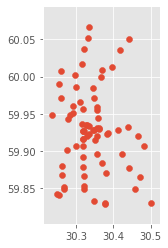

In [11]:
gmetro = gpd.GeoDataFrame(
    metro, geometry=gpd.points_from_xy(metro.LONGITUDE, metro.LATITUDE))
gmetro.crs = "EPSG:4326"
gmetro.plot()

In [12]:
gdf

ID_STOP                           STOP_NAME           LATITUDE  \
0      100101                      Пр.Ветеранов-1   59.8416038827508   
1      100102                      Пр.Ветеранов-2   59.8420417837763   
2      100103                     Ленинский пр.-1   59.8516834239607   
3      100104                     Ленинский пр.-2   59.8497096845857   
4      100105                              Автово   59.8672920598579   
...       ...                                 ...                ...   
7149     4997         ЗАВОД ИМ. КАЛИНИНА [тест] <  59.95069505060761   
7150     4998  МАЛЫЙ ПР. В.О. ПО 9 ЛИНИИ [тест] <  59.94569778533688   
7151     5003         АДМИРАЛТЕЙСКИЙ ПР. [тест] <  59.93602605740318   
7152     7069              ПР. ЛУНАЧАРСКОГО(тест)  60.03143940049296   
7153     7070               УЧИТЕЛЬСКАЯ УЛ (тест)  60.03380031542683   

             LONGITUDE                   geometry  
0     30.2539842396693  POINT (30.25398 59.84160)  
1       30.25008403131  POINT (30.25008 59.84204)  
2     30.2683847248898  POINT (30.26838 59.85168)  
3     30.2683477910985  POINT (30.26835 59.84971)  
4     30.2611327749718  POINT (30.26113 59.86729)  
...                ...                        ...  
7149        30.2661324  POINT (30.26613 59.95070)  
7150        30.2719688  POINT (30.27197 59.94570)  
7151        30.3092594  POINT (30.30926 59.93603)  
7152        30.3925724  POINT (30.39257 60.03144)  
7153        30.3936996  POINT (30.39370 60.03380)  

[7154 rows x 5 columns]

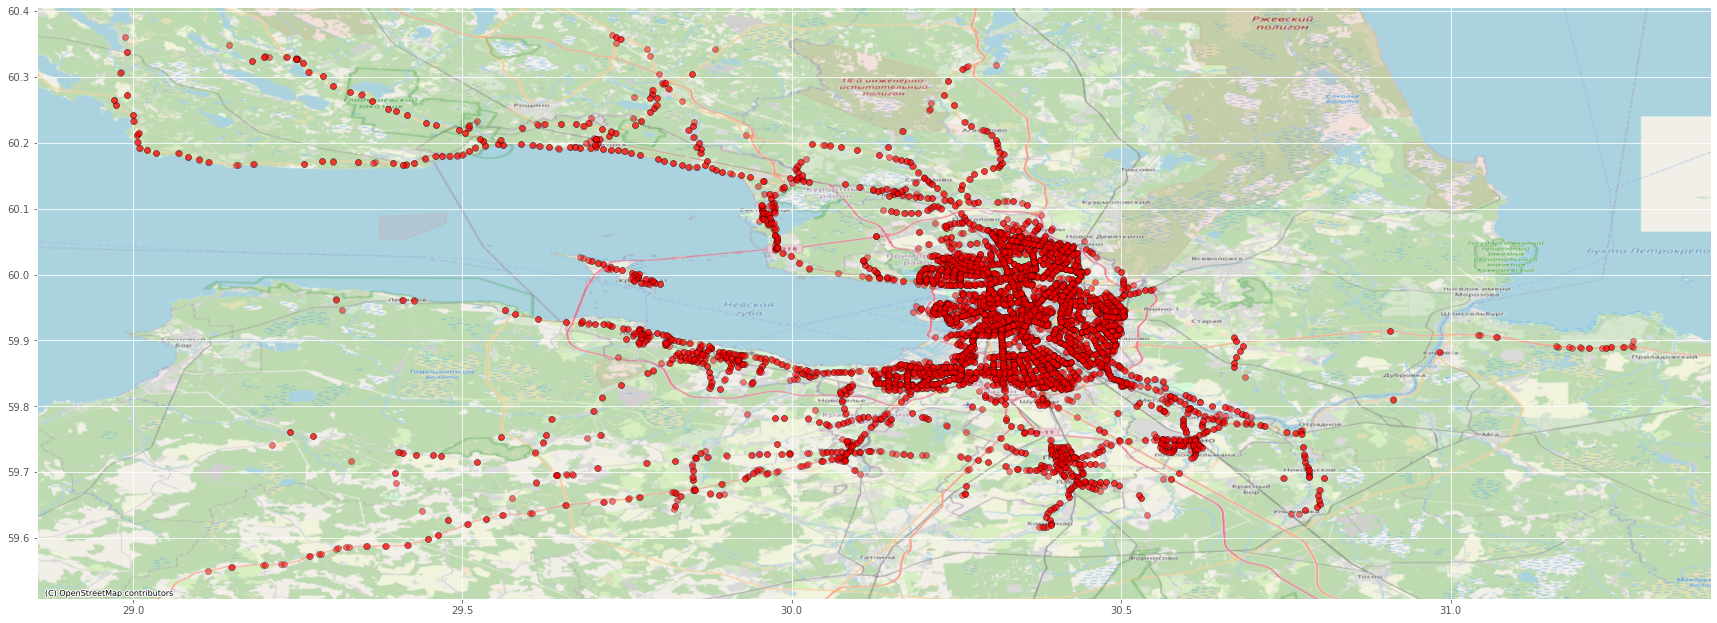

In [13]:
ax = gdf.plot(color="red", figsize=(30, 30), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax, 
                crs=gdf.crs.to_string(), 
                source=ctx.providers.OpenStreetMap.Mapnik)

ax = gmetro.plot(color="red", figsize=(30, 30), alpha=0.5, edgecolor='k')
#ax.axis((29, 31, 59, 61))
ctx.add_basemap(ax, 
                crs=gmetro.crs.to_string(), 
                source=ctx.providers.OpenStreetMap.Mapnik)

ax = gdf[gdf['ID_STOP'] == 100105].plot(color="red", figsize=(30, 30), alpha=0.5, edgecolor='k')
#ax.axis((29, 31, 59, 61))
ctx.add_basemap(ax, 
                crs=gmetro.crs.to_string(), 
                source=ctx.providers.OpenStreetMap.Mapnik, zoom = 10)

In [14]:
gdf.to_crs(epsg=3310,inplace=True)
gmetro.to_crs(epsg=3310,inplace=True)

In [15]:
near = gdf[gdf.distance(gmetro.geometry[44]) < 1000]
near.to_crs(epsg=4326,inplace=True)
near

/opt/anaconda3/lib/python3.7/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


ID_STOP                                      STOP_NAME  \
44     100301                                     Приморская   
291     14903                        Метро "Приморская" (10)   
293     14906    Улица Нахимова / Наличная улица (9, 10, 11)   
295     14908                  Набережная реки Смоленки (10)   
369     15001            Улица Кораблестроителей, 35 (9, 11)   
373     15006  Улица Кораблестроителей (конечная, 9, 10, 11)   
426     15059                        Метро "Приморская" (10)   
431     15063                                 Универсам (10)   
438     15070                    Уральская улица (9, 10, 11)   
1012    15667                           Уральская улица (10)   
1015    15671                                 Универсам (10)   
1018    15675                     Улица Нахимова, 18 (9, 11)   
1317    15973     Улица Кораблестроителей Т (конечная, 1, 6)   
1331    15987                       Уральская улица T (1, 6)   
1342    15999                             Универсам T (1, 6)   
1349    16006                    Метро "Приморская" T (1, 6)   
1352    16009                        Улица Нахимова T (1, 6)   
1563    16228                        Улица Нахимова T (1, 6)   
1566    16230                    Метро "Приморская" T (1, 6)   
1570    16234                             Универсам T (1, 6)   
1575    16239                       Уральская улица T (1, 6)   
1989     1665                        МАГАЗИН "СТРОИТЕЛЬ" [7]   
2121    16777                Улица Кораблестроителей (9, 11)   
2129    16787                         Улица Нахимова (9, 11)   
2131    16793                            Улица Нахимова (10)   
2353     1730                      НОВОСМОЛЕНСКАЯ НАБ.,2 [7]   
2355     1731                      НОВОСМОЛЕНСКАЯ НАБ.,6 [7]   
2641    18067                      ЖЕЛЕЗНОВОДСКАЯ УЛ. [128]<   
2642    18068                     СТАНЦИЯ МЕТРО "ПРИМОРСКАЯ"   
2685    18115                  СТ. МЕТРО "ПРИМОРСКАЯ" [128]<   
2686    18116                         УЛ. ОДОЕВСКОГО, 28 []<   
2687    18119                    ПР. КИМА, УГ. УРАЛЬСКОЙ УЛ.   
2723    18209                ЖЕЛЕЗНОВОДСКАЯ УЛ., УГ. ПР.КИМА   
4449    20878                      НОВОСМОЛЕНСКАЯ НАБ.(ТЕСТ)   
4461     2095                     СТ. МЕТРО "ПРИМОРСКАЯ" [7]   
4462     2096                         СТ. МЕТРО "ПРИМОРСКАЯ"   
4682    22165                            А.С. "НАЛИЧНАЯ УЛ."   
4768     2246                   УЛ. КОРАБЛЕСТРОИТЕЛЕЙ [1, 6]   
4774     2248                   УЛ. КОРАБЛЕСТРОИТЕЛЕЙ,35 [7]   
4836     2278                            УЛ. НАХИМОВА [1, 6]   
4840     2279                            УЛ. НАХИМОВА,18 [7]   
5270    24237                НАЛИЧНАЯ УЛ., УГ. УРАЛЬСКОЙ УЛ.   
5273     2424                      УНИВЕРСАМ "ГАВАНСКИЙ" [6]   
5694    25831                                       ПР. КИМа   
5853    27084            Улица Кораблестроителей (9, 10, 11)   
6115     2870                       МАГАЗИН "СТРОИТЕЛЬ" [7]<   
6119     2875        МАЛЫЙ ПР. В.О.,УГ. НАЛИЧНОЙ УЛ. [6, 1]<   
6146     2908             НАЛИЧНАЯ УЛ. УГ. УЛ. НАХИМОВА [7]<   
6161     2925                     НОВОСМОЛЕНСКАЯ НАБ.,6 [7]<   
6424     3284                    СТ. МЕТРО "ПРИМОРСКАЯ" [7]<   
6425     3285                         СТ. МЕТРО "ПРИМОРСКАЯ"   
6531     3428                          УЛ. КОРАБЛЕСТРОИТЕЛЕЙ   
6533     3430                  УЛ. КОРАБЛЕСТРОИТЕЛЕЙ,35 [7]<   
6561     3465                           УЛ. НАХИМОВА [1, 6]<   
6669     3605                     УНИВЕРСАМ "ГАВАНСКИЙ" [6]<   
7144     4988               ПР. КИМа, УГ. ЖЕЛЕЗНОВОДСКОЙ УЛ.   
7145     4989                                 УЛ. ОДОЕВСКОГО   
7146     4990                       УЛ. ОДОЕВСКОГО 28 [тест]   
7147     4992                УРАЛЬСКАЯ УЛ., УГ. НАЛИЧНОЙ УЛ.   
7148     4993                  УГОЛ ПР. КИМА И УРАЛЬСКОЙ УЛ.   

               LATITUDE         LONGITUDE                   geometry  
44      59.948558526973  30.23

In [16]:
link = linkage(near[['LONGITUDE', 'LATITUDE']], 'ward', 'euclidean')

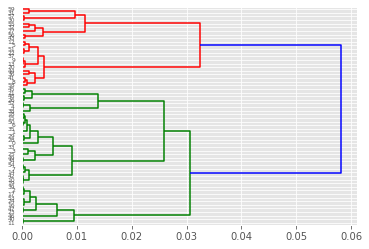

In [17]:
dn = dendrogram(link, orientation = "right")

In [18]:
dist = link[:, 2]
dist

array([1.41970835e-05, 4.97326202e-05, 7.66060809e-05, 8.87607673e-05,
       1.04595442e-04, 1.25016301e-04, 1.40704003e-04, 1.73729992e-04,
       1.95703988e-04, 2.32355400e-04, 2.46632457e-04, 2.49392251e-04,
       2.66435617e-04, 2.77580671e-04, 2.84951405e-04, 2.96106853e-04,
       3.00476970e-04, 3.36203092e-04, 3.80658460e-04, 3.96600627e-04,
       4.50867099e-04, 4.71190292e-04, 5.25433152e-04, 5.26111584e-04,
       5.57952246e-04, 5.72853581e-04, 6.14912733e-04, 6.22656957e-04,
       9.94298549e-04, 1.00267074e-03, 1.07074915e-03, 1.25500437e-03,
       1.25774201e-03, 1.27227147e-03, 1.30482065e-03, 1.31134147e-03,
       1.41197489e-03, 1.45242336e-03, 1.46756340e-03, 1.78331556e-03,
       2.29407475e-03, 2.30550194e-03, 2.45403470e-03, 2.47594825e-03,
       2.88895870e-03, 2.99134513e-03, 3.78144075e-03, 4.04651868e-03,
       5.63159788e-03, 6.46738315e-03, 9.10933622e-03, 9.46925652e-03,
       9.69908789e-03, 1.14038759e-02, 1.37734735e-02, 2.58219310e-02,
      

Text(0, 0.5, 'Distance')

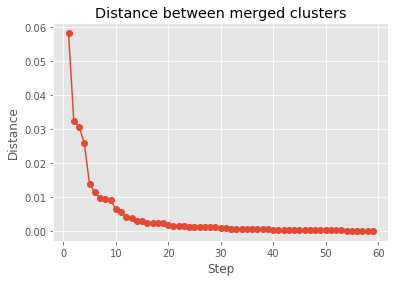

In [19]:
dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Distance between merged clusters')
plt.xlabel('Step')
plt.ylabel('Distance')
#plt.axhline(3, c='k', linestyle='dashed')
#plt.axhline(2.52, c='k', linestyle='dashed')
#plt.text(25, 3.1, '3 clusters')
#plt.text(22, 2.6, '4 clusters')

In [20]:
near['cluster'] = fcluster(link, 0.008, criterion='distance')
near.sort_values('cluster').head(60)

/opt/anaconda3/lib/python3.7/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


ID_STOP                                      STOP_NAME  \
4840     2279                            УЛ. НАХИМОВА,18 [7]   
1018    15675                     Улица Нахимова, 18 (9, 11)   
1563    16228                        Улица Нахимова T (1, 6)   
1352    16009                        Улица Нахимова T (1, 6)   
4836     2278                            УЛ. НАХИМОВА [1, 6]   
2129    16787                         Улица Нахимова (9, 11)   
6119     2875        МАЛЫЙ ПР. В.О.,УГ. НАЛИЧНОЙ УЛ. [6, 1]<   
2131    16793                            Улица Нахимова (10)   
6146     2908             НАЛИЧНАЯ УЛ. УГ. УЛ. НАХИМОВА [7]<   
6561     3465                           УЛ. НАХИМОВА [1, 6]<   
293     14906    Улица Нахимова / Наличная улица (9, 10, 11)   
5273     2424                      УНИВЕРСАМ "ГАВАНСКИЙ" [6]   
1342    15999                             Универсам T (1, 6)   
431     15063                                 Универсам (10)   
6669     3605                     УНИВЕРСАМ "ГАВАНСКИЙ" [6]<   
1570    16234                             Универсам T (1, 6)   
1015    15671                                 Универсам (10)   
6424     3284                    СТ. МЕТРО "ПРИМОРСКАЯ" [7]<   
6425     3285                         СТ. МЕТРО "ПРИМОРСКАЯ"   
4462     2096                         СТ. МЕТРО "ПРИМОРСКАЯ"   
4461     2095                     СТ. МЕТРО "ПРИМОРСКАЯ" [7]   
4449    20878                      НОВОСМОЛЕНСКАЯ НАБ.(ТЕСТ)   
2642    18068                     СТАНЦИЯ МЕТРО "ПРИМОРСКАЯ"   
2353     1730                      НОВОСМОЛЕНСКАЯ НАБ.,2 [7]   
44     100301                                     Приморская   
2685    18115                  СТ. МЕТРО "ПРИМОРСКАЯ" [128]<   
291     14903                        Метро "Приморская" (10)   
295     14908                  Набережная реки Смоленки (10)   
1566    16230                    Метро "Приморская" T (1, 6)   
1349    16006                    Метро "Приморская" T (1, 6)   
426     15059                        Метро "Приморская" (10)   
6533     3430                  УЛ. КОРАБЛЕСТРОИТЕЛЕЙ,35 [7]<   
369     15001            Улица Кораблестроителей, 35 (9, 11)   
4774     2248                   УЛ. КОРАБЛЕСТРОИТЕЛЕЙ,35 [7]   
2355     1731                      НОВОСМОЛЕНСКАЯ НАБ.,6 [7]   
1989     1665                        МАГАЗИН "СТРОИТЕЛЬ" [7]   
6161     2925                     НОВОСМОЛЕНСКАЯ НАБ.,6 [7]<   
6115     2870                       МАГАЗИН "СТРОИТЕЛЬ" [7]<   
6531     3428                          УЛ. КОРАБЛЕСТРОИТЕЛЕЙ   
373     15006  Улица Кораблестроителей (конечная, 9, 10, 11)   
438     15070                    Уральская улица (9, 10, 11)   
5853    27084            Улица Кораблестроителей (9, 10, 11)   
1012    15667                           Уральская улица (10)   
5270    24237                НАЛИЧНАЯ УЛ., УГ. УРАЛЬСКОЙ УЛ.   
1317    15973     Улица Кораблестроителей Т (конечная, 1, 6)   
1331    15987                       Уральская улица T (1, 6)   
4768     2246                   УЛ. КОРАБЛЕСТРОИТЕЛЕЙ [1, 6]   
4682    22165                            А.С. "НАЛИЧНАЯ УЛ."   
1575    16239                       Уральская улица T (1, 6)   
2121    16777                Улица Кораблестроителей (9, 11)   
7147     4992                УРАЛЬСКАЯ УЛ., УГ. НАЛИЧНОЙ УЛ.   
5694    25831                                       ПР. КИМа   
2723    18209                ЖЕЛЕЗНОВОДСКАЯ УЛ., УГ. ПР.КИМА   
2641    18067                      ЖЕЛЕЗНОВОДСКАЯ УЛ. [128]<   
7144     4988               ПР. КИМа, УГ. ЖЕЛЕЗНОВОДСКОЙ УЛ.   
7145     4989                                 УЛ. ОДОЕВСКОГО   
2686    18116                         УЛ. ОДОЕВСКОГО, 28 []<   
7146     4990                       УЛ. ОДОЕВСКОГО 28 [тест]   
2687    18119                    ПР. КИМА, УГ. УРАЛЬСКОЙ УЛ.   
7148     4993                  УГОЛ ПР. КИМА И УРАЛЬСКОЙ УЛ.   

               LATITUDE         LONGITUDE                   geometry  cluster  
4840  59.941431898644

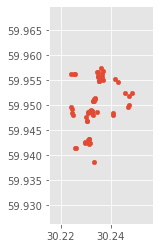

In [21]:
near.plot(markersize=20)

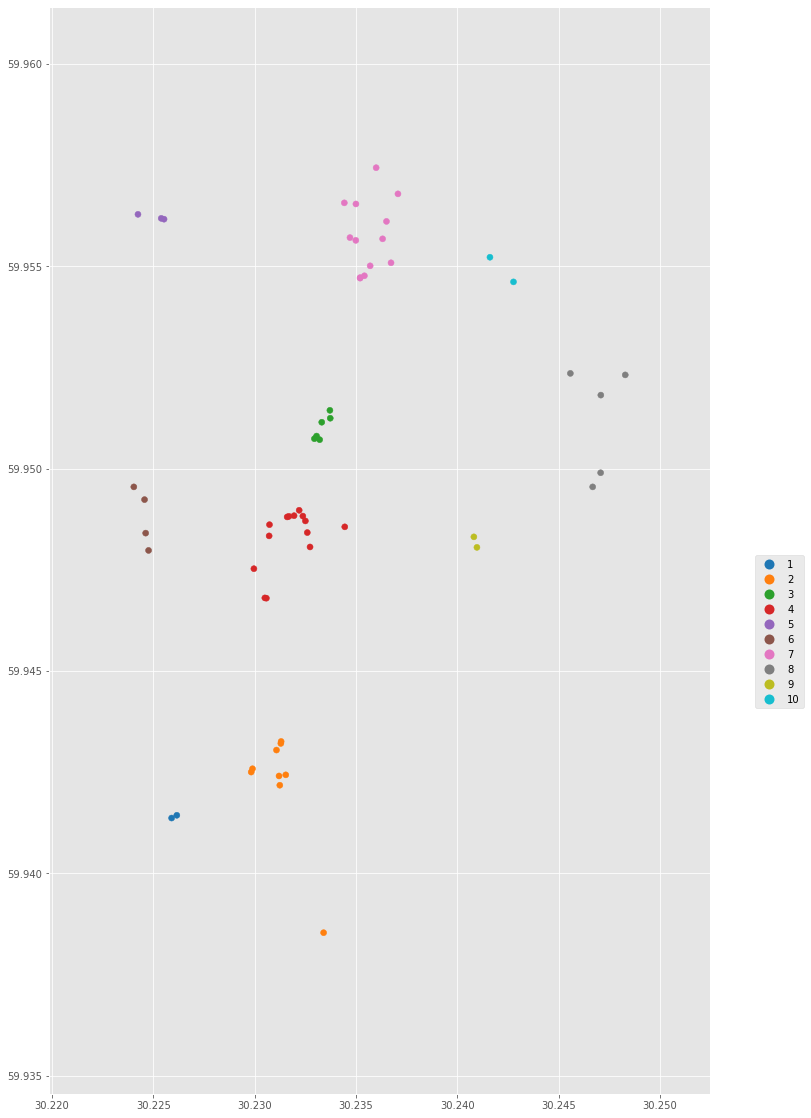

In [22]:
fig, ax = plt.subplots(figsize=(20, 20))

near.plot(column='cluster',
                categorical=True,
                legend=True,
                ax=ax)

# Adjust legend location
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.15,0.5))

plt.show()

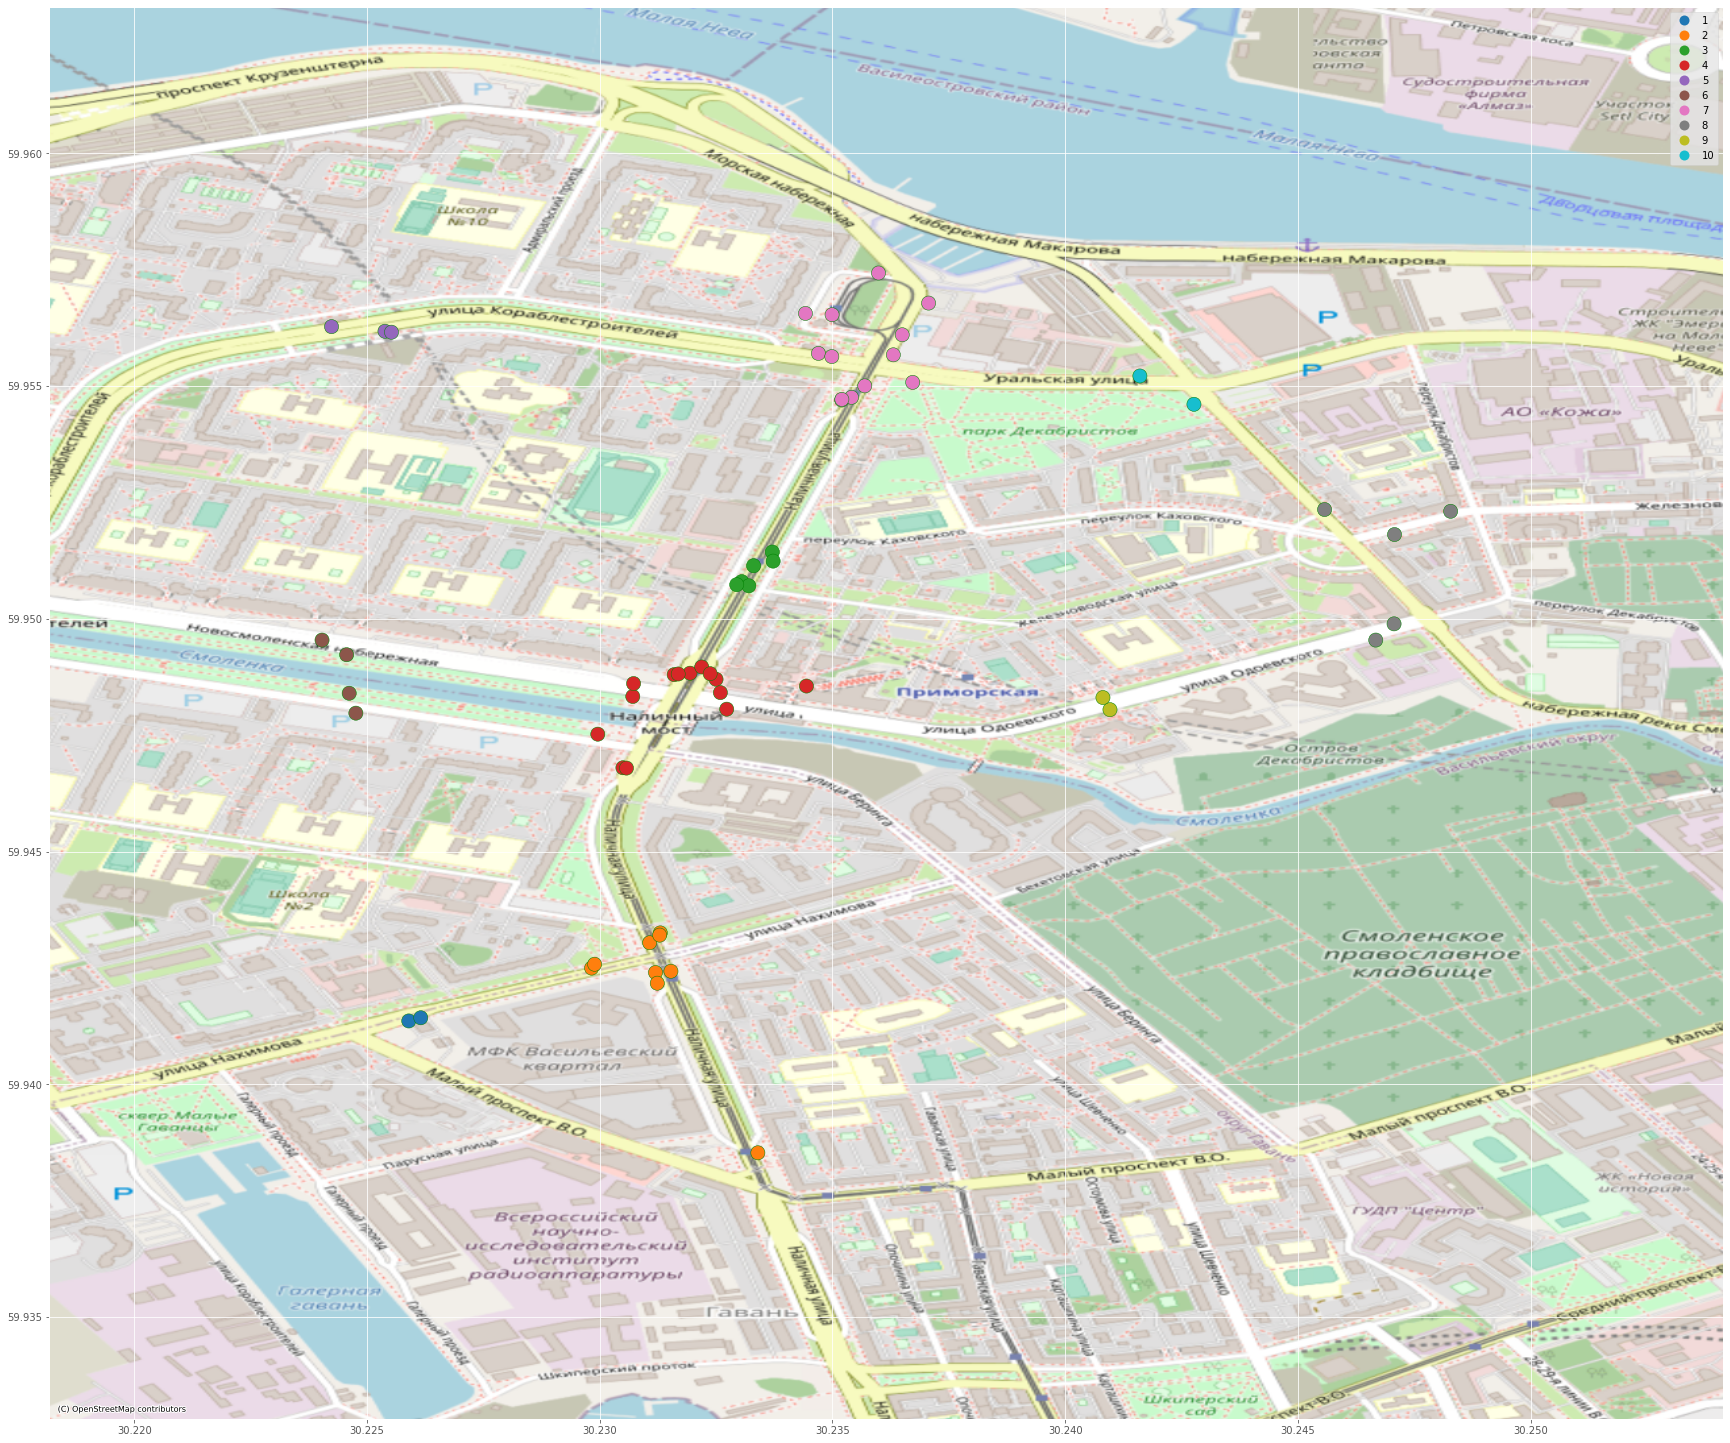

In [23]:
ax = near.plot(column='cluster',
                categorical=True,
                legend=True,
               figsize=(20, 30), alpha=1, edgecolor='g', markersize= 200)
ctx.add_basemap(ax, 
                crs=near.crs.to_string(), 
                source=ctx.providers.OpenStreetMap.Mapnik)

In [ ]:
near = gdf[gdf.distance(gmetro.geometry[33]) < 1000]
near
near.to_crs(epsg=4326,inplace=True)

In [ ]:
link = linkage(near[['LONGITUDE', 'LATITUDE']], 'ward', 'euclidean')

In [ ]:
dn = dendrogram(link, orientation = "right")

In [ ]:
dist = link[:, 2]
dist

In [ ]:
dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Distance between merged clusters')
plt.xlabel('Step')
plt.ylabel('Distance')
#plt.axhline(3, c='k', linestyle='dashed')
#plt.axhline(2.52, c='k', linestyle='dashed')
#plt.text(25, 3.1, '3 clusters')
#plt.text(22, 2.6, '4 clusters')

In [ ]:
near['cluster'] = fcluster(link, 0.005, criterion='distance')
near.sort_values('cluster').head(60)

In [ ]:
near.plot(markersize=20)

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))

near.plot(column='cluster',
                categorical=True,
                legend=True,
                ax=ax)

# Adjust legend location
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.15,0.5))

plt.show()

In [ ]:
ax = near.plot(column='cluster',
                categorical=True,
                legend=True,
               figsize=(30, 30), alpha=1, edgecolor='g', markersize= 200)
ctx.add_basemap(ax, 
                crs=near.crs.to_string(), 
                source=ctx.providers.OpenStreetMap.Mapnik)

In [ ]:
near = gdf[gdf.distance(gmetro.geometry[45]) < 1000]
near
near.to_crs(epsg=4326,inplace=True)

In [ ]:
link = linkage(near[['LONGITUDE', 'LATITUDE']], 'ward', 'euclidean')

In [ ]:
dn = dendrogram(link, orientation = "right")

In [ ]:
near['cluster'] = fcluster(link, 0.005, criterion='distance')
near.sort_values('cluster').head(60)

In [ ]:
near.plot(markersize=20)

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))

near.plot(column='cluster',
                categorical=True,
                legend=True,
                ax=ax)

# Adjust legend location
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.15,0.5))

plt.show()

In [ ]:
ax = near.plot(column='cluster',
                categorical=True,
                legend=True,
               figsize=(30, 30), alpha=1, edgecolor='g', markersize= 200)
ctx.add_basemap(ax, 
                crs=near.crs.to_string(), 
                source=ctx.providers.OpenStreetMap.Mapnik)

In [ ]:
near = gdf[gdf.distance(gmetro.geometry[4]) < 1000]
near.to_crs(epsg=4326,inplace=True)
near

In [ ]:
link = linkage(near[['LONGITUDE', 'LATITUDE']], 'ward', 'euclidean')

In [ ]:
dn = dendrogram(link, orientation = "right")

In [ ]:
near['cluster'] = fcluster(link, 0.01, criterion='distance')
near.sort_values('cluster').head(60)

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))

near.plot(column='cluster',
                categorical=True,
                legend=True,
                ax=ax)

# Adjust legend location
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.15,0.5))

plt.show()

In [ ]:
ax = near.plot(column='cluster',
                categorical=True,
                legend=True,
               figsize=(30, 30), alpha=1, edgecolor='g', markersize= 200)
ctx.add_basemap(ax, 
                crs=near.crs.to_string(), 
                source=ctx.providers.OpenStreetMap.Mapnik)

In [24]:
near = gdf[gdf.distance(gdf.geometry[4585]) < 2000]
near.to_crs(epsg=4326,inplace=True)
near

/opt/anaconda3/lib/python3.7/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


ID_STOP                                          STOP_NAME  \
118      1344                        АЛЕКСАНДРИЯ [200, 210, 359]   
143      1381      БОЛЬНИЦА [200, 210, 351, 355, 356, 356Б, 359]   
240     14744              КОНСТАНТИНОВСКАЯ УЛ. [354, 355][тест]   
861      1550              ЗНАМЕНКА,МОСТОВАЯ УЛ. [200, 210, 359]   
2122     1678    МАСТЕРОВОЙ ПЕР. [200, 210, 351, 356, 356Б, 359]   
2508     1785               ПЛОЩАДЬ АВРОВА [351, 355, 356, 356Б]   
3538     1938  ПРАВЛЕНСКАЯ УЛ. [200, 210, 351, 355, 356, 356Б...   
3748     1962      РАЗВОДНАЯ УЛ. [200, 210, 351, 356, 356Б, 359]   
3758     1963       РАЗВОДНАЯ УЛ. УГ. БУЛЬВАРА РАЗВЕДЧИКОВ [355]   
3766     1964      РАЗВОДНАЯ УЛ. УГ. ЭРЛЕРОВСКОГО БУЛЬВАРА [355]   
3937    19882                                      УЛ. ДАШКЕВИЧА   
3938    19883                                  УЛ.БР. ГОРКУШЕНКО   
3939    19884                                   УЛ. ЖАРНОВЕЦКОГО   
3940    19885                МАСТЕРОВОЙ ПЕР. УГ. Б-РА РАЗВЕДЧИКА   
3976    19927     РАЗВОДНАЯ УЛ., УГ. С-ПЕТЕРБУРГСКОГО ПР. (тест)   
3977    19928       БУЛЬВ. РАЗВЕДЧИКОВ, УГ. РАЗВОДНОЙ УЛ. (тест)   
3978    19929                                    МАСТЕРОВОЙ ПЕР.   
3981    19931                         ЭРЛЕРОВСКИЙ БУЛЬВАР (тест)   
3987    19937                        КОНСТАНТИНОВСКАЯ УЛ. (тест)   
3992    19943                                   УЛ. ЖАРНОВЕЦКОГО   
3993    19944                                      УЛ. ДАШКЕВИЧА   
3995    19946                                  УЛ. Б. ГОРКУШЕНКО   
4002    19952                                          УНИВЕРСАМ   
4028    19978         С.-ПЕТЕРБУРГСКИЙ ПР., УГ. МАСТЕРОВОГО ПЕР.   
4029    19980             БУЛЬВАР РАЗВЕДЧИКОВ, УГ. РАЗВОДНОЙ УЛ.   
4030    19981                                          УНИВЕРСАМ   
4266    20308                  САШИНСКАЯ УЛ., УГ. УЛ. ЛУИЗИНСКОЙ   
4267    20309                САШИНСКАЯ УЛ., УГ. УЛ. ЛУИЗИНСКОЙ <   
4269    20311                                       ЛУГОВОЙ ПАРК   
4270    20313                                     ЛУГОВОЙ ПАРК <   
4302    20348                            ЖЕЛЕЗНОДОРОЖНЫЙ ПЕРЕЕЗД   
4435    20841                        УЛ. АВРОВА, УГ. С-ПЕТЕР.ПР.   
4438    20844                                  УЛ. АВРОВА (ТЕСТ)   
4456    20901      А.С. "НОВЫЙ ПЕТЕРГОФ" (ПОСАДКИ И ВЫСАДКИ НЕТ)   
4457    20902                         ПЕТРОДВОРЕЦ, ВОКЗАЛ (ТЕСТ)   
4514     2139         ТОРГОВАЯ ПЛОЩАДЬ [351, 356, 210, 200, 359]   
4585     2160                         УЛ. АВРОВА [210, 359, 200]   
4700     2222                             УЛ. ЖАРНОВЕЦКОГО [355]   
4733    22317                                ПЕТРОДВОРЕЦ, ВОКЗАЛ   
4787    22497                             Г. ПЕТРОДВОРЕЦ, ВОКЗАЛ   
5420     2464              МУЗЕЙ "ДВОРЦОВАЯ ТЕЛЕГРАФНАЯ СТАНЦИЯ"   
5486     2488                          ЭРЛЕРОВСКИЙ БУЛЬВАР [351]   
5487     2490  ЭРЛЕРОВСКИЙ БУЛЬВАР,УГ. УЛ. АВРОВА [356Б, 356,...   
5607    25348                            БУЛЬВАР РАЗВЕДЧИКОВ, 10   
5626     2556                       АЛЕКСАНДРИЯ [200, 210, 359]<   
5700     2588     БОЛЬНИЦА [200, 210, 351, 355, 356, 356Б, 359]<   
5936     2755             ЗНАМЕНКА,МОСТОВАЯ УЛ. [200, 210, 359]<   
6124     2880   МАСТЕРОВОЙ ПЕР. [200, 210, 351, 356, 356Б, 359]<   
6197     2974              ПЛОЩАДЬ АВРОВА [351, 355, 356, 356Б]<   
6317     3136  ПРАВЛЕНСКАЯ УЛ. [200, 210, 351, 355, 356, 356Б...   
6332     3156     РАЗВОДНАЯ УЛ. [200, 210, 351, 356, 356Б, 359]<   
6464     3346  УЛ. АВРОВА,УГ. С-ПЕТЕРБУРГС. ПР. [351, 356, 35...   
6510     3405                            УЛ. ЖАРНОВЕЦКОГО [355]<   
6701     3642              МУЗЕЙ "ДВОРЦОВАЯ ТЕЛЕГРАФНАЯ СТАНЦИЯ"   
6718     3666                         ЭРЛЕРОВСКИЙ БУЛЬВАР [351]<   
6719     3668  ЭРЛЕРОВСКИЙ БУЛЬВАР,УГ. УЛ. АВРОВА [356Б, 356,...   

               LATITUDE   LONGITUDE                   geometry  
118   59.87510160324203  29.9439621  POINT (29.94396 59.87510)  

In [25]:
link = linkage(near[['LONGITUDE', 'LATITUDE']], 'ward', 'euclidean')

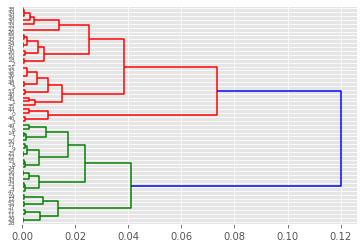

In [26]:
dn = dendrogram(link, orientation = "right")

In [28]:
near['cluster'] = fcluster(link, 0.01, criterion='distance')
near.sort_values('cluster').head(60)

/opt/anaconda3/lib/python3.7/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


ID_STOP                                          STOP_NAME  \
4269    20311                                       ЛУГОВОЙ ПАРК   
3995    19946                                  УЛ. Б. ГОРКУШЕНКО   
4270    20313                                     ЛУГОВОЙ ПАРК <   
3938    19883                                  УЛ.БР. ГОРКУШЕНКО   
4700     2222                             УЛ. ЖАРНОВЕЦКОГО [355]   
3992    19943                                   УЛ. ЖАРНОВЕЦКОГО   
3939    19884                                   УЛ. ЖАРНОВЕЦКОГО   
6510     3405                            УЛ. ЖАРНОВЕЦКОГО [355]<   
4028    19978         С.-ПЕТЕРБУРГСКИЙ ПР., УГ. МАСТЕРОВОГО ПЕР.   
6124     2880   МАСТЕРОВОЙ ПЕР. [200, 210, 351, 356, 356Б, 359]<   
3978    19929                                    МАСТЕРОВОЙ ПЕР.   
3940    19885                МАСТЕРОВОЙ ПЕР. УГ. Б-РА РАЗВЕДЧИКА   
2122     1678    МАСТЕРОВОЙ ПЕР. [200, 210, 351, 356, 356Б, 359]   
5607    25348                            БУЛЬВАР РАЗВЕДЧИКОВ, 10   
3758     1963       РАЗВОДНАЯ УЛ. УГ. БУЛЬВАРА РАЗВЕДЧИКОВ [355]   
3977    19928       БУЛЬВ. РАЗВЕДЧИКОВ, УГ. РАЗВОДНОЙ УЛ. (тест)   
3981    19931                         ЭРЛЕРОВСКИЙ БУЛЬВАР (тест)   
4002    19952                                          УНИВЕРСАМ   
4029    19980             БУЛЬВАР РАЗВЕДЧИКОВ, УГ. РАЗВОДНОЙ УЛ.   
4030    19981                                          УНИВЕРСАМ   
3766     1964      РАЗВОДНАЯ УЛ. УГ. ЭРЛЕРОВСКОГО БУЛЬВАРА [355]   
6317     3136  ПРАВЛЕНСКАЯ УЛ. [200, 210, 351, 355, 356, 356Б...   
3976    19927     РАЗВОДНАЯ УЛ., УГ. С-ПЕТЕРБУРГСКОГО ПР. (тест)   
3748     1962      РАЗВОДНАЯ УЛ. [200, 210, 351, 356, 356Б, 359]   
3538     1938  ПРАВЛЕНСКАЯ УЛ. [200, 210, 351, 355, 356, 356Б...   
6332     3156     РАЗВОДНАЯ УЛ. [200, 210, 351, 356, 356Б, 359]<   
5936     2755             ЗНАМЕНКА,МОСТОВАЯ УЛ. [200, 210, 359]<   
5626     2556                       АЛЕКСАНДРИЯ [200, 210, 359]<   
118      1344                        АЛЕКСАНДРИЯ [200, 210, 359]   
861      1550              ЗНАМЕНКА,МОСТОВАЯ УЛ. [200, 210, 359]   
5700     2588     БОЛЬНИЦА [200, 210, 351, 355, 356, 356Б, 359]<   
4514     2139         ТОРГОВАЯ ПЛОЩАДЬ [351, 356, 210, 200, 359]   
143      1381      БОЛЬНИЦА [200, 210, 351, 355, 356, 356Б, 359]   
5420     2464              МУЗЕЙ "ДВОРЦОВАЯ ТЕЛЕГРАФНАЯ СТАНЦИЯ"   
6464     3346  УЛ. АВРОВА,УГ. С-ПЕТЕРБУРГС. ПР. [351, 356, 35...   
4435    20841                        УЛ. АВРОВА, УГ. С-ПЕТЕР.ПР.   
4438    20844                                  УЛ. АВРОВА (ТЕСТ)   
2508     1785               ПЛОЩАДЬ АВРОВА [351, 355, 356, 356Б]   
4585     2160                         УЛ. АВРОВА [210, 359, 200]   
6701     3642              МУЗЕЙ "ДВОРЦОВАЯ ТЕЛЕГРАФНАЯ СТАНЦИЯ"   
6197     2974              ПЛОЩАДЬ АВРОВА [351, 355, 356, 356Б]<   
5487     2490  ЭРЛЕРОВСКИЙ БУЛЬВАР,УГ. УЛ. АВРОВА [356Б, 356,...   
6719     3668  ЭРЛЕРОВСКИЙ БУЛЬВАР,УГ. УЛ. АВРОВА [356Б, 356,...   
6718     3666                         ЭРЛЕРОВСКИЙ БУЛЬВАР [351]<   
3993    19944                                      УЛ. ДАШКЕВИЧА   
3987    19937                        КОНСТАНТИНОВСКАЯ УЛ. (тест)   
3937    19882                                      УЛ. ДАШКЕВИЧА   
240     14744              КОНСТАНТИНОВСКАЯ УЛ. [354, 355][тест]   
5486     2488                          ЭРЛЕРОВСКИЙ БУЛЬВАР [351]   
4266    20308                  САШИНСКАЯ УЛ., УГ. УЛ. ЛУИЗИНСКОЙ   
4267    20309                САШИНСКАЯ УЛ., УГ. УЛ. ЛУИЗИНСКОЙ <   
4787    22497                             Г. ПЕТРОДВОРЕЦ, ВОКЗАЛ   
4733    22317                                ПЕТРОДВОРЕЦ, ВОКЗАЛ   
4457    20902                         ПЕТРОДВОРЕЦ, ВОКЗАЛ (ТЕСТ)   
4456    20901      А.С. "НОВЫЙ ПЕТЕРГОФ" (ПОСАДКИ И ВЫСАДКИ НЕТ)   
4302    20348                            ЖЕЛЕЗНОДОРОЖНЫЙ ПЕРЕЕЗД   

               LATITUDE   LONGITUDE                   geometry  cluster  
4269  59.86352329541558  29.9079819  POINT (29.90798 59

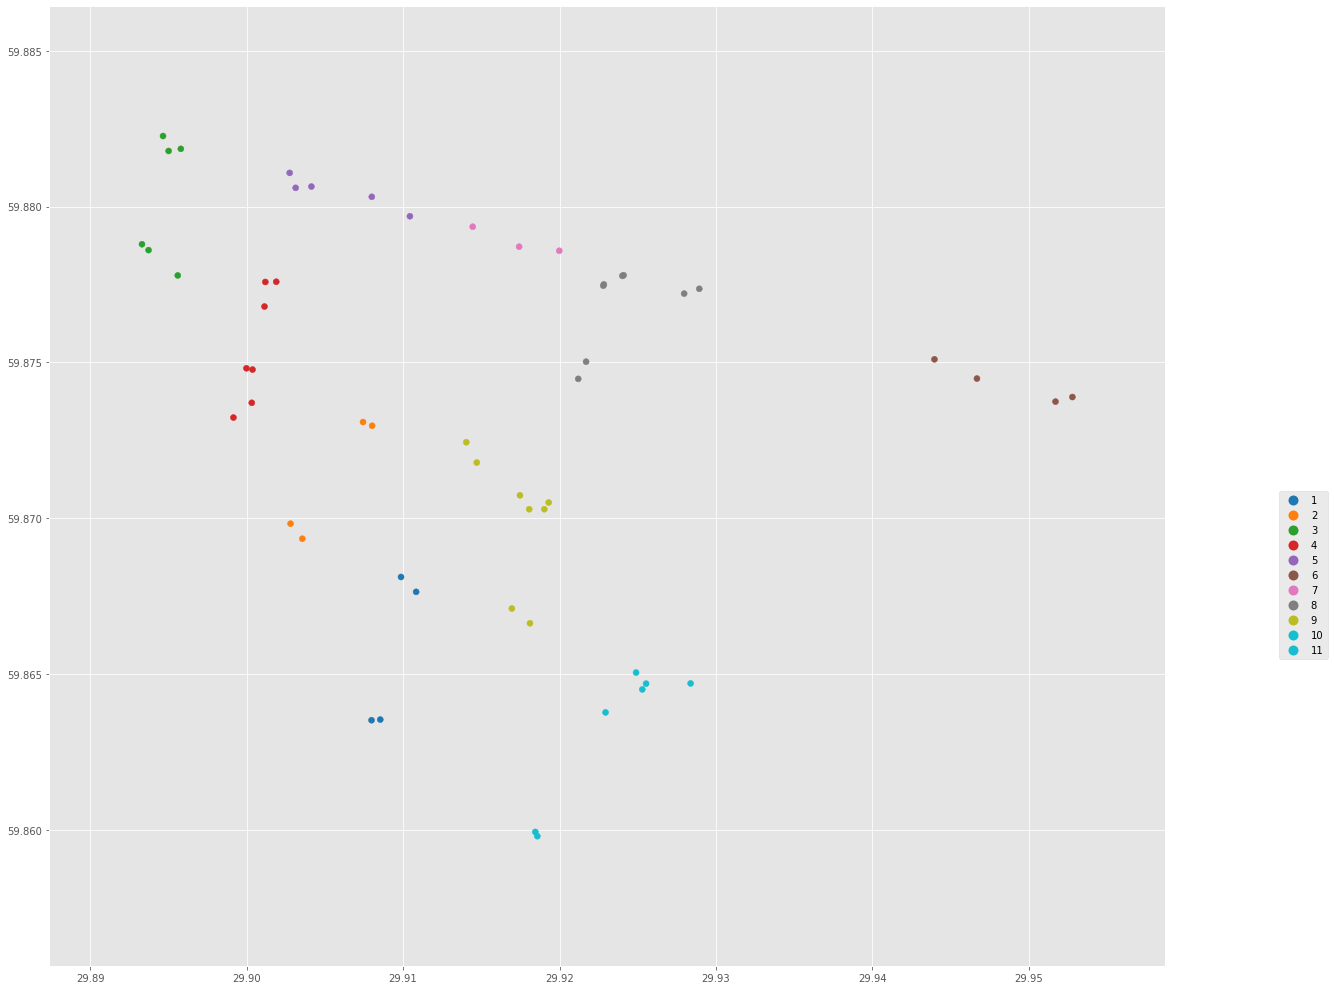

In [29]:
fig, ax = plt.subplots(figsize=(20, 20))

near.plot(column='cluster',
                categorical=True,
                legend=True,
                ax=ax)

# Adjust legend location
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.15,0.5))

plt.show()

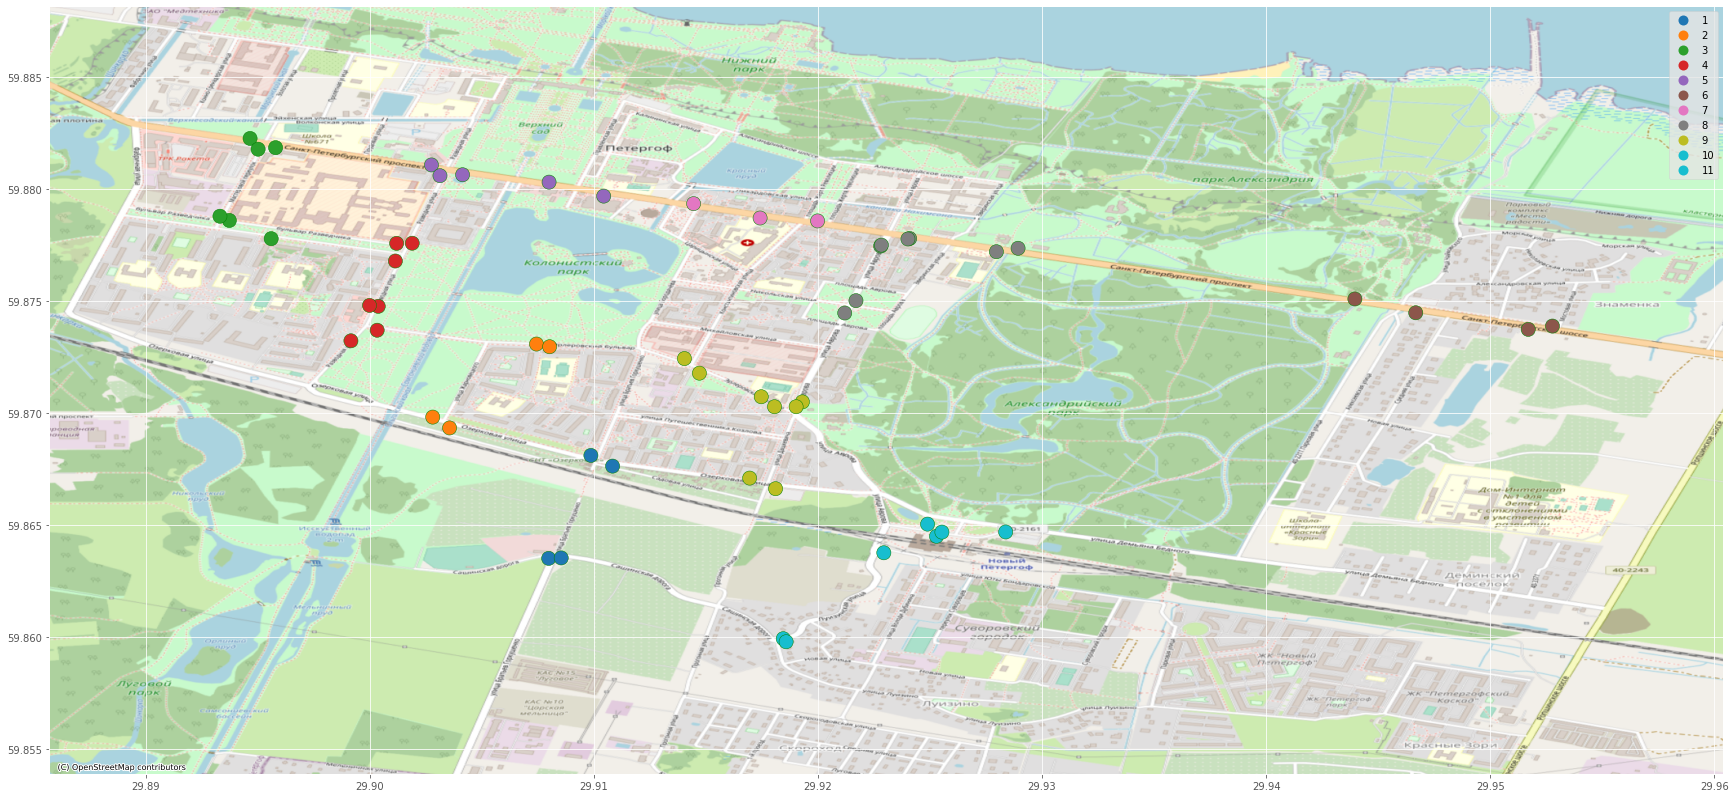

In [30]:
ax = near.plot(column='cluster',
                categorical=True,
                legend=True,
               figsize=(30, 30), alpha=1, edgecolor='g', markersize= 200)
ctx.add_basemap(ax, 
                crs=near.crs.to_string(), 
                source=ctx.providers.OpenStreetMap.Mapnik)